# Convergence Analysis Across R Values

This notebook visualizes how PEHE and PEHE Plug-in metrics converge as the number of repetitions (R) increases.
We compare different tuners across dimensional settings for both X_CB and X_RF models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

## Load Data from Multiple R Values

In [ ]:
# Define the R values we want to analyze (adjust based on available data)
r_values = [5, 10, 20]  # Modify this list based on your available results folders

# Settings and models
settings = ['1d', '2d', '4d', '6d']
models = ['x_cb', 'x_rf']

# Load data for each R value
all_data = []

for r in r_values:
    folder_path = Path(f'../results/R_{r}')
    
    if not folder_path.exists():
        print(f"Warning: Folder {folder_path} does not exist. Skipping R={r}")
        continue
    
    for setting in settings:
        for model in models:
            file_path = folder_path / f'{setting}/{model}/raw_results.csv'
            
            if file_path.exists():
                df = pd.read_csv(file_path)
                df['setting'] = setting
                df['model'] = model
                df['r_value'] = r
                all_data.append(df)
            else:
                print(f"Warning: File {file_path} not found")

# Combine all data
if len(all_data) > 0:
    combined_df = pd.concat(all_data, ignore_index=True)
    print(f"Loaded data for R values: {sorted(combined_df['r_value'].unique())}")
    print(f"Total records: {len(combined_df)}")
else:
    print("No data loaded. Please check your folder structure.")

Loaded data for R values: [np.int64(5), np.int64(10), np.int64(20)]
Total records: 700


## Calculate Mean Values for Each R

In [5]:
# Calculate mean PEHE and PEHE Plug-in for each combination
convergence_data = combined_df.groupby(['r_value', 'setting', 'model', 'tuner']).agg({
    'pehe': 'mean',
    'pehe_plug': 'mean'
}).reset_index()

print("Convergence data summary:")
print(convergence_data.head(10))

Convergence data summary:
   r_value setting model   tuner      pehe  pehe_plug
0        5      1d  x_cb   bayes  0.169143   0.437980
1        5      1d  x_cb    grid  0.134617   0.339558
2        5      1d  x_cb  random  0.136123   0.361133
3        5      1d  x_rf   bayes  0.147534   0.377845
4        5      1d  x_rf    grid  0.146164   0.374707
5        5      1d  x_rf  random  0.144156   0.366320
6        5      2d  x_cb   bayes  0.121770   0.336344
7        5      2d  x_cb    grid  0.125106   0.326618
8        5      2d  x_cb  random  0.201856   0.446947
9        5      2d  x_rf   bayes  0.140817   0.358158


## Convergence Plots by Dimensional Setting

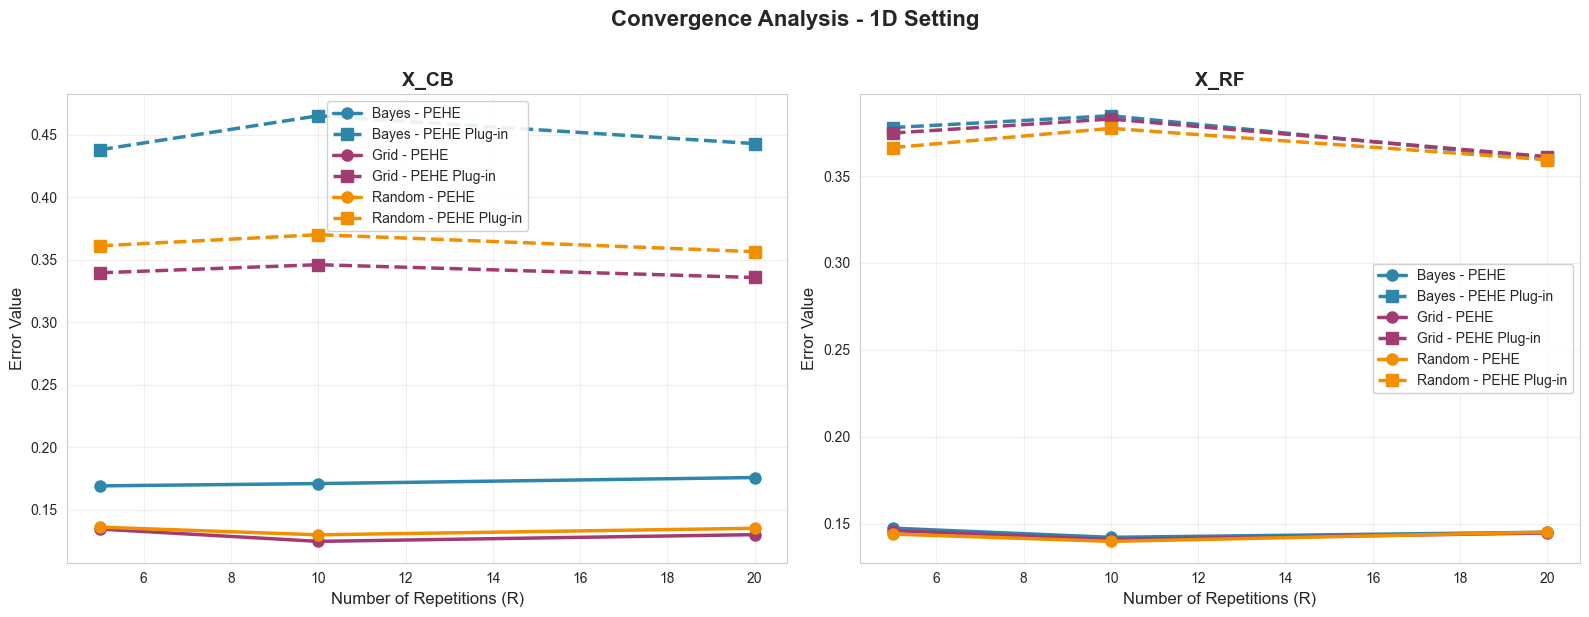

Saved: convergence_1d.png


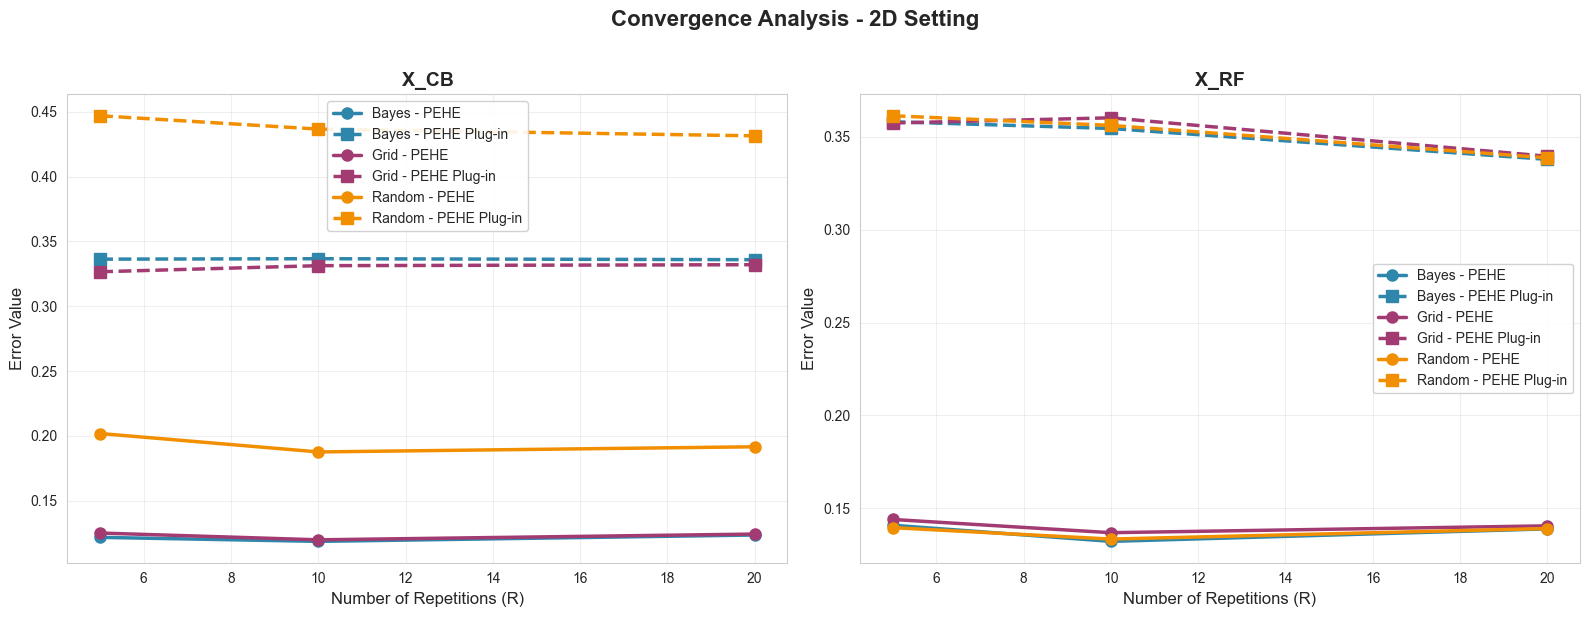

Saved: convergence_2d.png


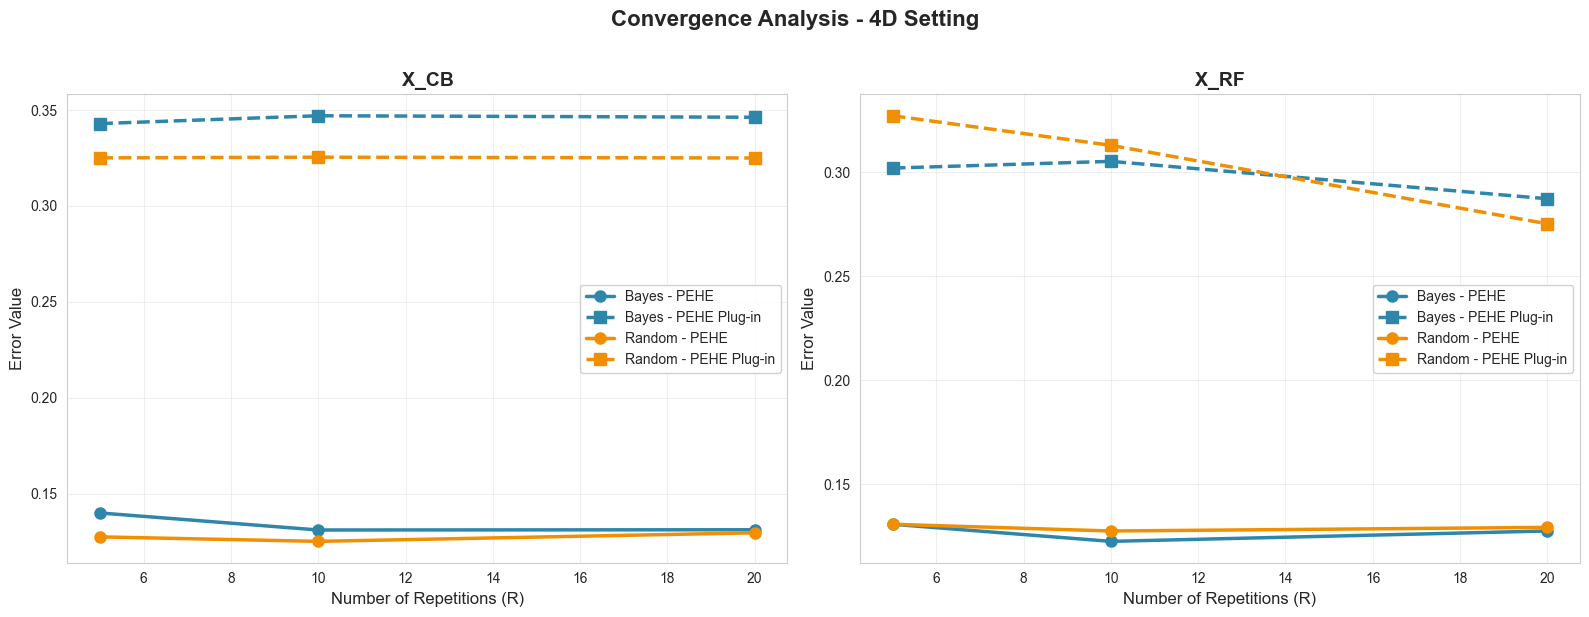

Saved: convergence_4d.png


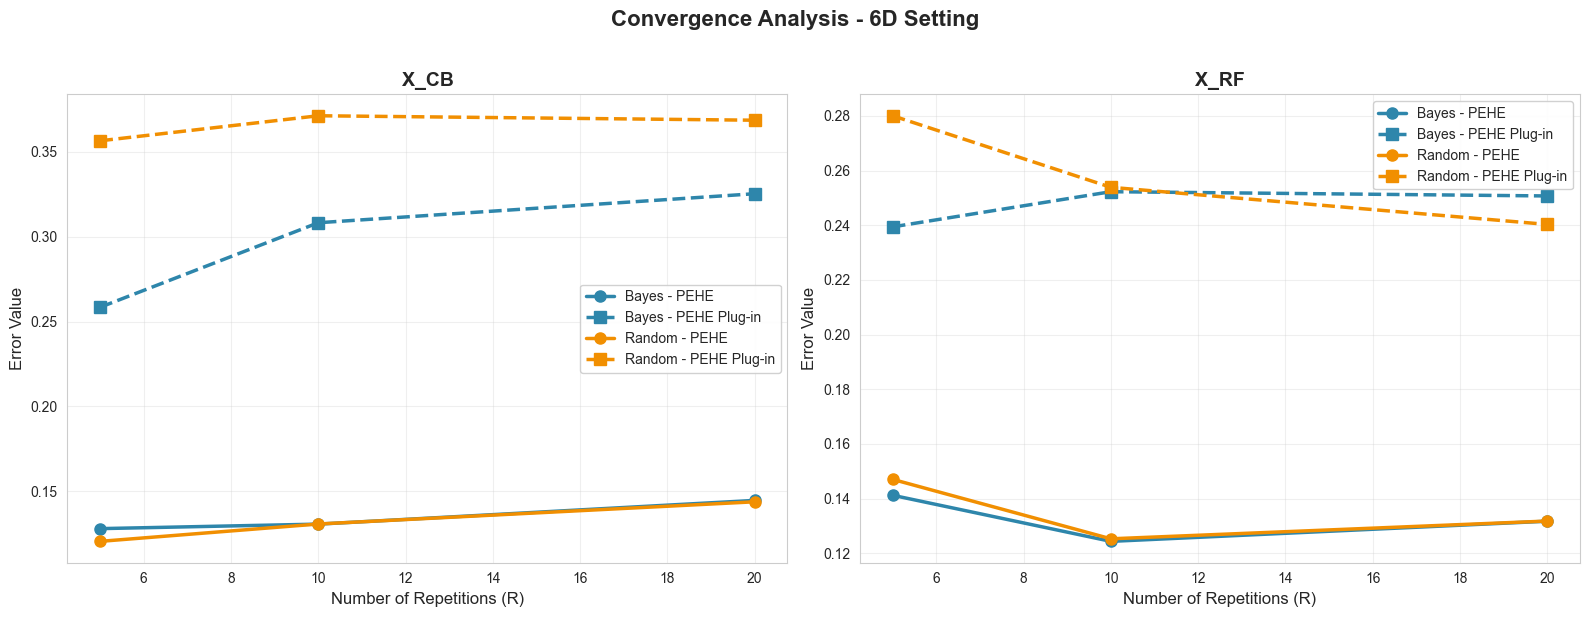

Saved: convergence_6d.png


In [6]:
# Define colors for tuners
tuner_colors = {
    'bayes': '#2E86AB',
    'grid': '#A23B72',
    'random': '#F18F01'
}

# Create plots for each dimensional setting
for setting in settings:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Convergence Analysis - {setting.upper()} Setting', fontsize=16, fontweight='bold', y=1.02)
    
    for idx, model in enumerate(models):
        ax = axes[idx]
        model_data = convergence_data[
            (convergence_data['setting'] == setting) & 
            (convergence_data['model'] == model)
        ]
        
        # Plot for each tuner
        for tuner in ['bayes', 'grid', 'random']:
            tuner_data = model_data[model_data['tuner'] == tuner].sort_values('r_value')
            
            if len(tuner_data) == 0:
                continue
            
            color = tuner_colors[tuner]
            
            # Plot PEHE with solid line
            ax.plot(tuner_data['r_value'], tuner_data['pehe'], 
                    color=color, linestyle='-', linewidth=2.5, 
                    marker='o', markersize=8, label=f'{tuner.capitalize()} - PEHE')
            
            # Plot PEHE Plug-in with dashed line
            ax.plot(tuner_data['r_value'], tuner_data['pehe_plug'], 
                    color=color, linestyle='--', linewidth=2.5, 
                    marker='s', markersize=8, label=f'{tuner.capitalize()} - PEHE Plug-in')
        
        ax.set_title(f'{model.upper()}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Number of Repetitions (R)', fontsize=12)
        ax.set_ylabel('Error Value', fontsize=12)
        ax.legend(loc='best', fontsize=10, framealpha=0.9)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    filename = f'convergence_{setting}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Saved: {filename}")